# Aquecimento 1: análise de dados IRGA com SciPy

Como aquecimento e demonstração das possibilidades do ambiente, vamos analisar dados provenientes de um disposito IRGB (*infra-red gas analyser*). Neste exemplo, **40 plantas** foram analisadas em **12 dias** diferentes. Em cada dia, para cada planta, foram obtidas **4 medições** para as seguintes variáveis:

* *A* - taxa de assimilação de CO$_2$,
* *gs* - condutância estomática,
* *C$_i$* - concentração intercelular de CO$_2$,
* *E* - taxa de transpiração.

Uma maneira natural de representar esses dados é utilizar uma **tabela** de valores numéricos. Computacionalmente, vamos utilizar uma **estrutura** de dados chamada de *matriz* ou *array*. 

Python é uma linguagem de programação. Sua funcionalidade básica é expandida com o uso de **módulos**. Há um conjunto de módulos, chamado de **SciPy Stack**, que adiciona ao ambiente uma série de funcionalidades comumente utilizadas em **computação científica**. Um desses módulos é chamado de **NumPy** e é utilizado para criação e manipulação de arrays.

Resumindo, utilizaremos **NumPy para manipular tabelas numéricas com nossos dados de IRGA**. Para importar o módulo, basta utilizar o comando:

In [1]:
import numpy

Nossos dados estão em uma tabela CSV (*comma-separated values*), uma forma simples de representar tabelas em arquivos. Abaixo estão as 10 primeiras linhas do arquivo:

In [2]:
!head data/pheno-irga-dia11.csv

A;gs;E;Ci
33.6491401839225;0.250859113102811;4.74819300588148;119.207565353659
39.9505774987877;0.336445629994432;5.57841986232047;133.484928623388
30.2122755502531;0.214374820865742;4.19312084675806;113.765752474792
32.0832740326768;0.210631425776747;4.16362909039323;92.9027168628308
30.2508652434561;0.216691776198334;4.23908567763283;116.042716529691
34.5797354435639;0.236856658495617;4.47347264034459;98.9281187985163
31.6684177725924;0.245270961272869;4.57783889528323;130.413464836187
34.4413842760489;0.23857872473937;4.46671252627147;101.79064963821
34.7883906691637;0.311443380975331;5.27144355864789;152.950723724841


Queremos esses dados representados devidamente como um *array NumPy* que possamos manipular. Podemos utilizar o módulo NumPy para realizar a leitura dos dados:

In [3]:
numpy.loadtxt(fname='data/pheno-irga-dia11.csv', delimiter=';', skiprows=1)

array([[  3.36491402e+01,   2.50859113e-01,   4.74819301e+00,
          1.19207565e+02],
       [  3.99505775e+01,   3.36445630e-01,   5.57841986e+00,
          1.33484929e+02],
       [  3.02122756e+01,   2.14374821e-01,   4.19312085e+00,
          1.13765752e+02],
       [  3.20832740e+01,   2.10631426e-01,   4.16362909e+00,
          9.29027169e+01],
       [  3.02508652e+01,   2.16691776e-01,   4.23908568e+00,
          1.16042717e+02],
       [  3.45797354e+01,   2.36856658e-01,   4.47347264e+00,
          9.89281188e+01],
       [  3.16684178e+01,   2.45270961e-01,   4.57783890e+00,
          1.30413465e+02],
       [  3.44413843e+01,   2.38578725e-01,   4.46671253e+00,
          1.01790650e+02],
       [  3.47883907e+01,   3.11443381e-01,   5.27144356e+00,
          1.52950724e+02],
       [  3.85425001e+01,   3.93409107e-01,   5.97622932e+00,
          1.68657172e+02],
       [  3.76307210e+01,   3.15638579e-01,   5.27206093e+00,
          1.36653664e+02],
       [  3.03932359e

Acima, nós utilizamos a **função** `loadtxt` no módulo NumPy para fazer a leitura do CSV e criar um *array* com seu conteúdo. A função recebeu 3 **parâmetros**: o caminho para o arquivo, o caracter delimitador utilizado para separar as colunas no arquivo CSV e o número de colunas de cabeçalho que deveriam ser ignoradas durante a leitura.

O comando acima não armazenou o *array* em uma **variável** para que possamos referenciá-lo e manipulá-lo posteriormente. Suponha que desejamos referenciar esses dados pelo nome `irga_day1`. Isto pode ser feito facilmente com:

In [4]:
irga_day1 = numpy.loadtxt(fname='data/pheno-irga-dia11.csv', delimiter=';', skiprows=1)

In [5]:
print(irga_day1)

[[  3.36491402e+01   2.50859113e-01   4.74819301e+00   1.19207565e+02]
 [  3.99505775e+01   3.36445630e-01   5.57841986e+00   1.33484929e+02]
 [  3.02122756e+01   2.14374821e-01   4.19312085e+00   1.13765752e+02]
 [  3.20832740e+01   2.10631426e-01   4.16362909e+00   9.29027169e+01]
 [  3.02508652e+01   2.16691776e-01   4.23908568e+00   1.16042717e+02]
 [  3.45797354e+01   2.36856658e-01   4.47347264e+00   9.89281188e+01]
 [  3.16684178e+01   2.45270961e-01   4.57783890e+00   1.30413465e+02]
 [  3.44413843e+01   2.38578725e-01   4.46671253e+00   1.01790650e+02]
 [  3.47883907e+01   3.11443381e-01   5.27144356e+00   1.52950724e+02]
 [  3.85425001e+01   3.93409107e-01   5.97622932e+00   1.68657172e+02]
 [  3.76307210e+01   3.15638579e-01   5.27206093e+00   1.36653664e+02]
 [  3.03932359e+01   2.13614839e-01   3.95755408e+00   1.11810534e+02]
 [  3.72603824e+01   3.19938014e-01   5.14012496e+00   1.41897930e+02]
 [  4.10243184e+01   3.94744147e-01   5.57800042e+00   1.55843524e+02]
 [  3.

## O que temos na memória?

Podemos ver que variáveis temos em memória e quanto espaço estão consumindo com o comando `%whos`:

In [6]:
%whos

Variable    Type       Data/Info
--------------------------------
irga_day1   ndarray    40x4: 160 elems, type `float64`, 1280 bytes
numpy       module     <module 'numpy' from '/us<...>ages/numpy/__init__.pyc'>


## Informações sobre o array

Um *array NumPy* não é meramente uma tabela com valores. Ele é um **objeto**, uma estrutura de dados especial que, além dos dados, armazena alguns **atributos** e implementa diversas **operações** úteis. 

### Exemplos de atributos

In [7]:
irga_day1.shape

(40, 4)

Como esperado, temos um *array* $40 \times 4$, correspondendo a 40 plantas e 4 medidas por planta.

In [8]:
irga_day1.dtype

dtype('float64')

As medidas estão sendo armazenadas como *números reais*, representados no computador pelo tipo *ponto flutuante* com 64 bits. 

### Exemplos de operações

In [9]:
irga_day1.mean(axis=0)

array([  18.74234704,    0.15200917,    2.64263339,  106.54359334])

Uma das diversas operações implementadas pelo objeto *array* é o **cômputo da média**. Acima, podemos ver os valores médios observados para *A*, *gs*, *E* e $C_i$ respectivamente.

## Acesso a elementos no *array*

A taxa de transpiração $E$ está na 3ª coluna. Considere que desejamos acessar a taxa para a 5ª planta. Queremos assim acesso à 3ª coluna da 5ª linha.

In [10]:
irga_day1[4,2]

4.2390856776328301

Os números acima entre colchetes, `[i,j]`, são **índices**. O primeiro indexa a *linha*, o segundo a *coluna*. Assim, `irga_day1[4,2]` referencia a linha 4, coluna 1. 

O que pode causar estranheza é o fato de desejarmos incialmente a 3ª coluna na 5ª linha. Linguagens de programação como C++, Java e Python **iniciam a indexação por 0 (zero)**. A primeira linha é a linha 0, a segunda a linha 1 e assim por diante. Logo, a 5ª linha corresponde à linha 4:

* 1ª linha - linha 0,
* 2ª linha - linha 1,
* 3ª linha - linha 2,
* 4ª linha - linha 3,
* **5ª linha - linha 4**.

O mesmo vale para as colunas, de forma que a coluna 2 corresponde à 3ª linha. Assim, nosso *array* $40 \times 4$ é referenciados por linhas de 0 a 39 e colunas de 0 a 3. 

Esta é sem dúvida uma das maiores dificuldades iniciais enfrentada por pesquisadores sem experiência prévia com computação, ou cuja experiência se baseia nas linguagens Fortran ou Matlab, que indexam  a partir do índice 1, como é mais intuitivo à maioria das pessoas. 

##  "Fatiando arrays": slicing

In [11]:
irga_day1[:,2]

array([ 4.74819301,  5.57841986,  4.19312085,  4.16362909,  4.23908568,
        4.47347264,  4.5778389 ,  4.46671253,  5.27144356,  5.97622932,
        5.27206093,  3.95755408,  5.14012496,  5.57800042,  4.39882985,
        4.70799638,  4.28260528,  5.90209151,  5.26118401,  4.65345101,
        0.52239819,  0.47556059,  0.63991002,  0.51606252,  0.62828122,
        0.71801995,  0.57917595,  0.57790777,  0.62747411,  0.04373013,
        0.52625717,  0.03789811,  0.11363707,  0.15779862,  0.84977127,
        0.67148671,  0.60430525,  0.2574946 ,  0.20714616,  0.10897625])

Acima, temos todos os valores de $E$ para as 40 plantas. Podemos facilmente computar a média:

In [12]:
irga_day1[:,2].mean()

2.642633387807674

In [13]:
E = irga_day1[:,2]
maxval, minval, stdval, meanval = numpy.max(E), numpy.min(E), numpy.std(E), numpy.mean(E)

print('Taxa de transpiracao:')
print('Maxima:', maxval)
print('Minima:', minval)
print('Media:', meanval)
print('Desvio padrao:', stdval)

Taxa de transpiracao:
('Maxima:', 5.9762293153770498)
('Minima:', 0.037898109687938997)
('Media:', 2.642633387807674)
('Desvio padrao:', 2.2459831098603491)


In [14]:
import matplotlib
from matplotlib import pyplot 
%matplotlib notebook
import seaborn

<IPython.core.display.Javascript object>


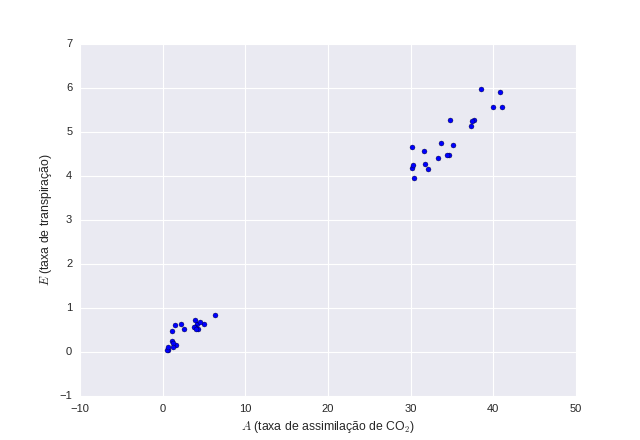

In [17]:
pyplot.scatter(irga_day1[:,0], irga_day1[:,2])
pyplot.xlabel(u'$A$ (taxa de assimilação de CO$_2$)')
pyplot.ylabel(u'$E$ (taxa de transpiração)')

<IPython.core.display.Javascript object>


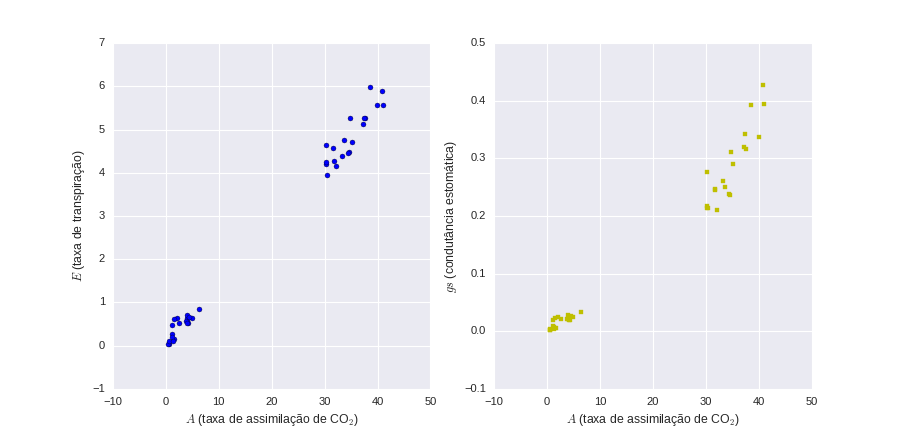

In [18]:
pyplot.subplot(1,2,1)
pyplot.scatter(irga_day1[:,0], irga_day1[:,2])
pyplot.xlabel(u'$A$ (taxa de assimilação de CO$_2$)')
pyplot.ylabel(u'$E$ (taxa de transpiração)')

pyplot.subplot(1,2,2)
pyplot.scatter(irga_day1[:,0], irga_day1[:,1], marker='s', color='y')
pyplot.xlabel(u'$A$ (taxa de assimilação de CO$_2$)')
pyplot.ylabel(u'$gs$ (condutância estomática)')

In [52]:
numpy.argwhere(irga_day1[:,0] < 10)

array([[20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39]])

Plantas submetidas a estresse hídrico.

In [43]:
days = [1, 3, 4, 5, 6, 7, 9, 10, 11, 16, 17]

In [44]:
csv_files = ['data/pheno-irga-day%.2d.csv' % d for d in days]
csv_files

['data/pheno-irga-day01.csv',
 'data/pheno-irga-day03.csv',
 'data/pheno-irga-day04.csv',
 'data/pheno-irga-day05.csv',
 'data/pheno-irga-day06.csv',
 'data/pheno-irga-day07.csv',
 'data/pheno-irga-day09.csv',
 'data/pheno-irga-day10.csv',
 'data/pheno-irga-day11.csv',
 'data/pheno-irga-day16.csv',
 'data/pheno-irga-day17.csv']

In [45]:
irga_data_day = [numpy.loadtxt(filename, delimiter=';', skiprows=1) for filename in csv_files]
irga_data = numpy.dstack(irga_data_day)

In [46]:
irga_data.shape

(40, 4, 11)

In [47]:
# Planta 0 (1ª planta), E nos 11 dias
irga_data[0,3,:]

array([ 5.05267575,  4.59028883,  4.59028883,  5.03886152,  3.97486472,
        5.3524078 ,  5.11403755,  5.37893   ,  4.74819301,  4.90270044,
        5.53625233])

<IPython.core.display.Javascript object>


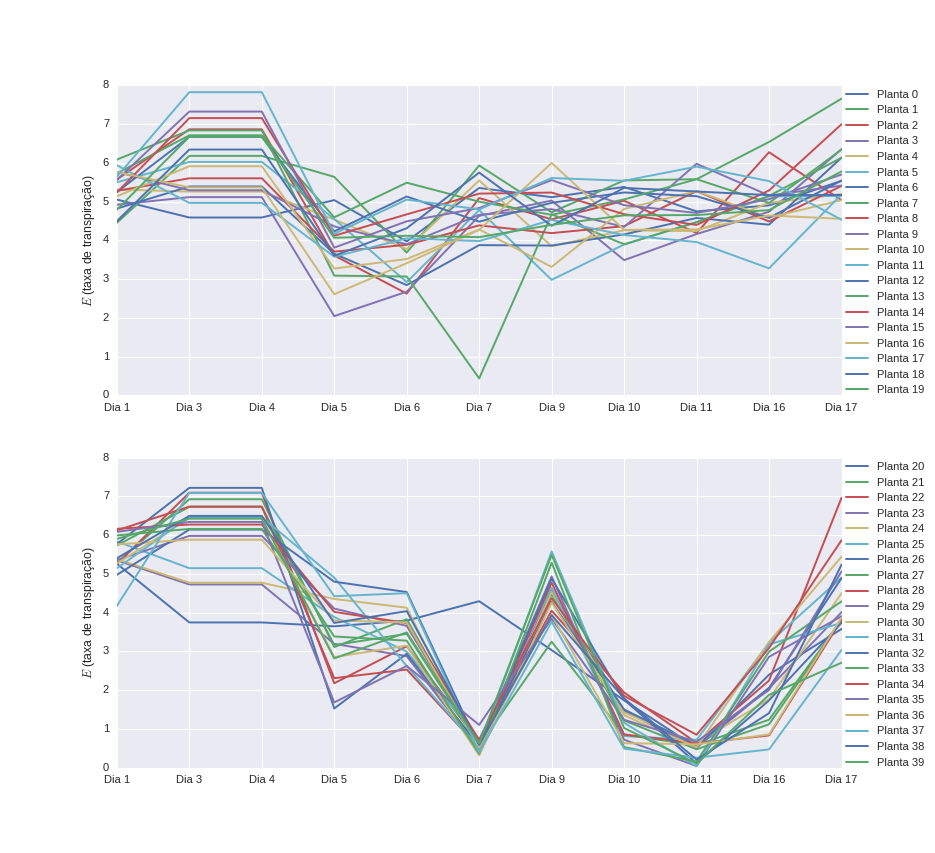

In [63]:
pyplot.subplot(2,1,1)
for p in range(20):
    pyplot.plot(irga_data[p,3,:], label='Planta %d' % p)    
    ticks = pyplot.xticks(range(11), ['Dia %d' % d for d in days])
pyplot.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
pyplot.ylabel(u'$E$ (taxa de transpiração)')
    
pyplot.subplot(2,1,2)
for p in range(20, 40):
    pyplot.plot(irga_data[p,3,:], label='Planta %d' % p)
    ticks = pyplot.xticks(range(11), ['Dia %d' % d for d in days])    
pyplot.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
pyplot.ylabel(u'$E$ (taxa de transpiração)')

# Aquecimento 2: imagens térmicas com SciPy

In [ ]:
T = numpy.loadtxt('data/GR009.txt')

In [72]:
T.shape

(240, 320)

<IPython.core.display.Javascript object>


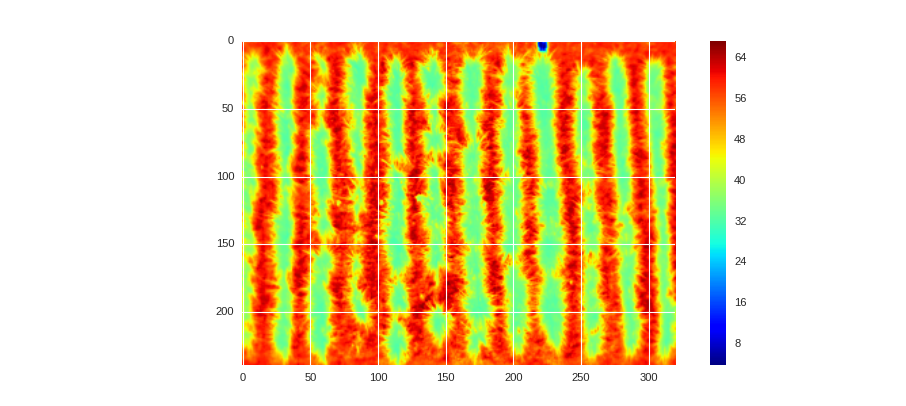

In [66]:
pyplot.imshow(T, cmap=pyplot.cm.jet)
pyplot.colorbar()

In [68]:
from skimage import io

In [70]:
I = io.imread('data/DC_0010.jpg')
I.shape

(710, 947, 3)

<IPython.core.display.Javascript object>


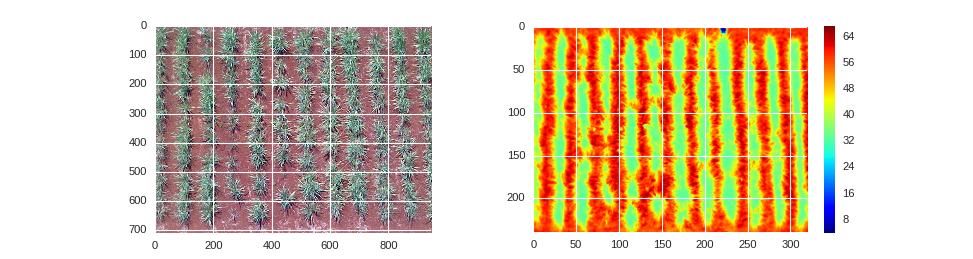

In [73]:
pyplot.subplot(1,2,1)
pyplot.imshow(I)

pyplot.subplot(1,2,2)
pyplot.imshow(T, cmap=pyplot.cm.jet)
pyplot.colorbar()

<IPython.core.display.Javascript object>


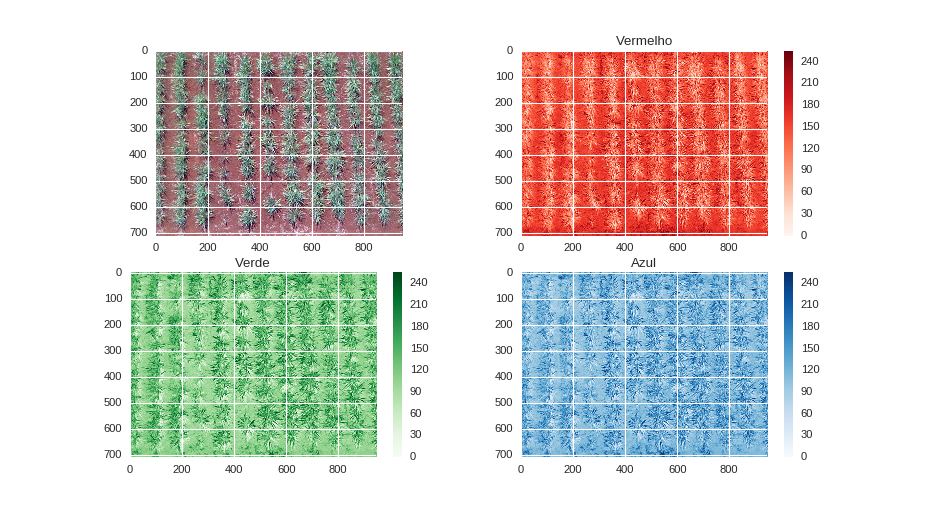

In [133]:
pyplot.subplot(2,2,1)
pyplot.imshow(I)

pyplot.subplot(2,2,2)
pyplot.imshow(I[:,:,0], cmap=pyplot.cm.Reds) # Canal vermelho
pyplot.colorbar()
pyplot.title('Vermelho')

pyplot.subplot(2,2,3)
pyplot.imshow(I[:,:,1], cmap=pyplot.cm.Greens) # Canal verde
pyplot.colorbar()
pyplot.title('Verde')

pyplot.subplot(2,2,4)
pyplot.imshow(I[:,:,2], cmap=pyplot.cm.Blues) # Canal azul
pyplot.colorbar()
pyplot.title('Azul')

<IPython.core.display.Javascript object>


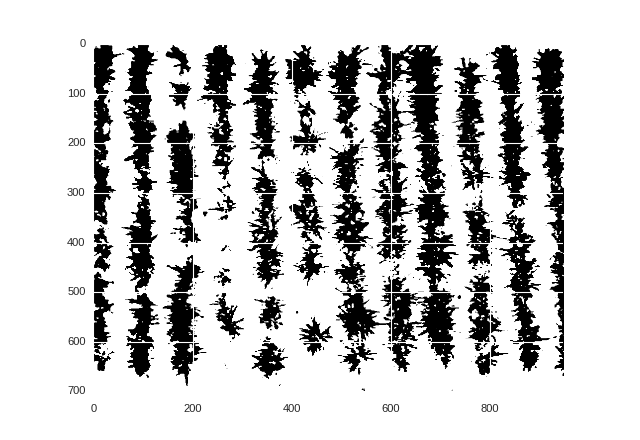

In [101]:
I_red = I[:,:,0]
I_green = I[:,:,1]
leaf_mask = I_green > 0.95 * I_red
pyplot.imshow(leaf_mask)

<IPython.core.display.Javascript object>


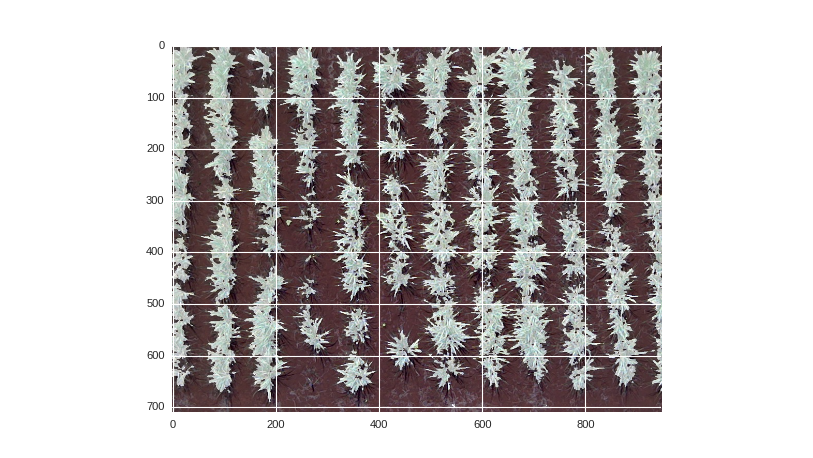

In [136]:
pyplot.imshow(I)
pyplot.imshow(leaf_mask, alpha=0.5, cmap=pyplot.cm.binary_r)

In [105]:
from skimage import transform

In [116]:
print(leaf_mask.shape)
mask = transform.resize(leaf_mask, T.shape)
print(mask.shape)

(710, 947)
(240, 320)


In [117]:
mask_aligned = numpy.zeros_like(mask, dtype=numpy.bool)
mask_aligned[8:-8,0:-8] = mask[0:-16,4:-4] 
mask = mask_aligned
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

<IPython.core.display.Javascript object>


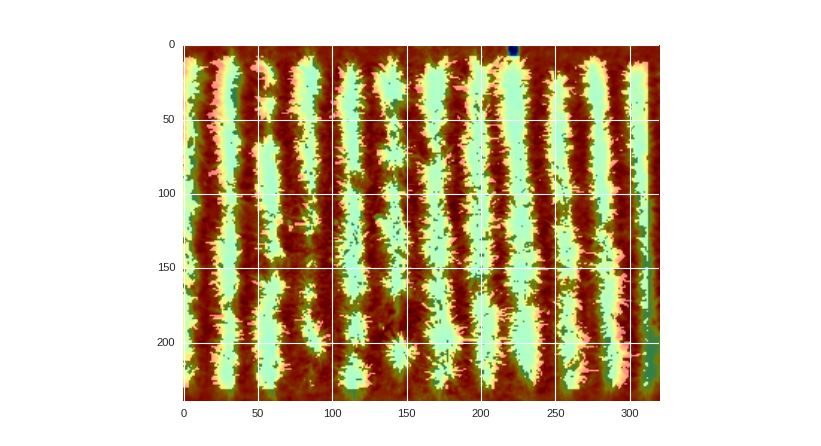

In [138]:
pyplot.imshow(T, cmap=pyplot.cm.jet)
pyplot.imshow(mask, alpha=0.5, cmap=pyplot.cm.binary_r)

In [125]:
temp_plant = T[mask]
temp_soil = T[mask == False]

<IPython.core.display.Javascript object>


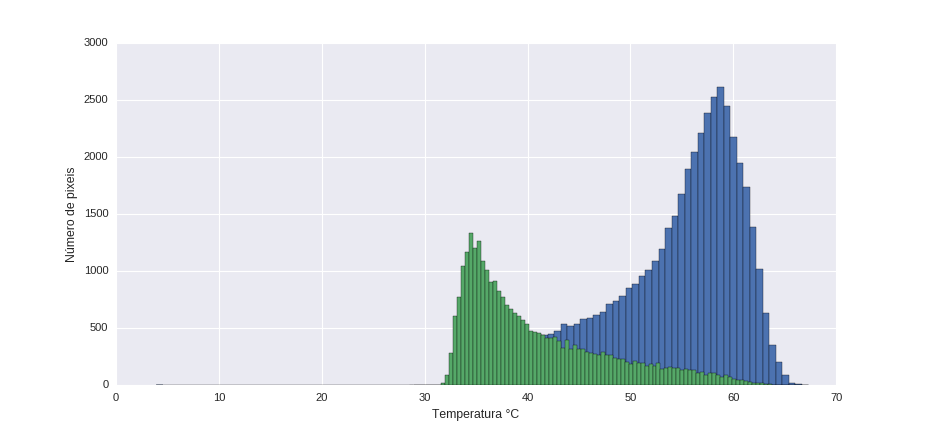

In [131]:
hist_temp_soil = pyplot.hist(temp_soil, bins=100, label='Solo')
hist_temp_plant = pyplot.hist(temp_plant, bins=100, label='Plantas')
pyplot.xlabel(u'Temperatura °C')
pyplot.ylabel(u'Número de pixeis')